In [75]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re

## Explore Data

### Outline:
1. Download data
2. Perform EDA
3. Create working sample

In [76]:
train_frame = pd.read_csv('train.csv')
test_frame = pd.read_csv('test.csv')

In [77]:
train_frame = train_frame.sample(frac=0.1,random_state=123)
train_frame.shape

(130612, 3)

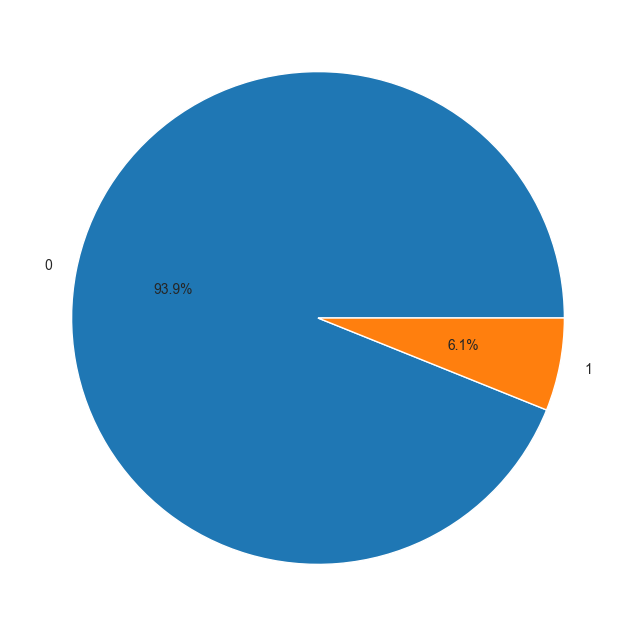

In [78]:
counts = train_frame['target'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(x=counts,labels=counts.index,autopct="%1.1f%%")
plt.show()

In [10]:
from collections import Counter
sincere_question_list = list(train_frame[train_frame.target==1]['question_text'])
sincere_question = ''.join(sincere_question_list)
words = re.findall(r'\b\w+\b', sincere_question.lower())
word_counts = Counter(words)
print(word_counts)


Counter({'the': 2548, 'to': 1815, 'why': 1769, 'and': 1430, 'a': 1328, 'is': 1287, 'of': 1225, 'do': 1214, 'are': 1101, 'in': 1051, 'that': 801, 'it': 733, 'they': 645, 'i': 622, 'for': 575, 'people': 559, 't': 519, 'you': 498, 'have': 482, 'with': 482, 'how': 464, 'so': 458, 'what': 453, 'their': 444, 's': 419, 'can': 418, 'or': 411, 'as': 411, 'if': 391, 'be': 384, 'on': 357, 'when': 349, 'not': 336, 'women': 321, 'trump': 304, 'does': 282, 'like': 277, 'my': 261, 'by': 255, 'from': 253, 'about': 247, 'who': 241, 'all': 224, 'men': 217, 'will': 217, 'don': 213, 'them': 205, 'more': 201, 'than': 199, 'an': 197, 'did': 194, 'this': 192, 'would': 192, 'many': 192, 'white': 186, 'there': 184, 'muslims': 183, 'think': 179, 'was': 178, 'get': 176, 'quora': 175, 'but': 174, 'should': 169, 'he': 168, 'has': 166, 'other': 166, 'we': 165, 'us': 161, 'india': 157, 'americans': 152, 'just': 152, 'black': 151, 'most': 144, 'indian': 133, 'indians': 129, 'his': 129, 'sex': 128, 'your': 127, 'me': 

Surprisingly trump is quite high

## Text Processing Techniques
1. Understand BOW
2. Tokenization
3. Stopword removal
4. Stemming

#### BOW 
1. Create alist of all word in all texts
2. Create vector count for each text

Limitations:
1. Too many words
2. Very frequent words 
3. Very rare words
4. Different forms of same word

In [1]:
from nltk.tokenize import word_tokenize

In [8]:
train_frame['question_text']=train_frame['question_text'].map(word_tokenize)

In [3]:
from nltk.corpus import stopwords
english_stopwords = stopwords.words('english')

def remove_stopwords(tokens):
    return [words for words in tokens if words.lower() not in english_stopwords]


In [10]:
train_frame['question_text'] = train_frame['question_text'].map(remove_stopwords)

In [11]:
train_frame

,qid,question_text,target
677319,84a4f7330c8c4d25c658,"[people, tend, answer, question, question, ?]",0
802133,9d2d218a2089665a6865,"[add, excess, magnesium, aqueous, potassium, s...",0
357211,4603f825d33f12072cc2,"[least, max, possible, sentence, warrant, cutt...",0
165764,20642d7de9e049df5ae7,"[job, options, intellectuals, ,, physicists, ,...",0
441097,5673897ea5e990e5acb5,"[make, St., Stephens, College, DU, BA, (, hons...",0
...,...,...,...
334291,4182c88c9c70b5b9396c,"[makes, country, interesting, unique, ?]",0
912073,b2bab5a376f860e43c9b,"[use, base64, ?]",0
1235543,f221becf9370b407b3db,"[Marvel, DC, Villain, actually, successful, de...",0
1274539,f9c6d4563af140a6a1b2,"[weed, make, gay, ?]",1


 ## Implement Bag of Words 

In [19]:
from nltk.stem import PorterStemmer
def stemmer(tokens):
    ps = PorterStemmer()
    return [ps.stem(words) for words in tokens]
# train_frame['question_text'] = train_frame['question_text'].map(stemmer)

In [13]:
train_frame

,qid,question_text,target
677319,84a4f7330c8c4d25c658,"[peopl, tend, answer, question, question, ?]",0
802133,9d2d218a2089665a6865,"[add, excess, magnesium, aqueou, potassium, su...",0
357211,4603f825d33f12072cc2,"[least, max, possibl, sentenc, warrant, cut, a...",0
165764,20642d7de9e049df5ae7,"[job, option, intellectu, ,, physicist, ,, sci...",0
441097,5673897ea5e990e5acb5,"[make, st., stephen, colleg, du, ba, (, hon, )...",0
...,...,...,...
334291,4182c88c9c70b5b9396c,"[make, countri, interest, uniqu, ?]",0
912073,b2bab5a376f860e43c9b,"[use, base64, ?]",0
1235543,f221becf9370b407b3db,"[marvel, dc, villain, actual, success, destroy...",0
1274539,f9c6d4563af140a6a1b2,"[weed, make, gay, ?]",1



## ML models/ Classification

In [79]:
%%time
ps = PorterStemmer()

def word_tokenizer(text):
    return [ps.stem(word) for word in word_tokenize(text)]

word_tokenizer("whay is rhe time noe , please")

CPU times: user 362 µs, sys: 742 µs, total: 1.1 ms
Wall time: 1.12 ms


['whay', 'is', 'rhe', 'time', 'noe', ',', 'pleas']

In [80]:
from sklearn.feature_extraction.text import CountVectorizer

    
vectorizer = CountVectorizer(
    lowercase=True,
    tokenizer=word_tokenizer,
    stop_words=english_stopwords,
    max_features=1000,
    input='content'
)

In [81]:
test_text = ['this is test text']
vectorizer.fit(test_text)

/Users/anshujoshi/anaconda3/envs/cancer/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/anshujoshi/anaconda3/envs/cancer/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'abov', 'ani', 'becaus', 'befor', 'could', 'doe', 'dure', 'ha', 'hi', 'might', 'must', "n't", 'need', 'onc', 'onli', 'ourselv', 'sha', 'themselv', 'thi', 'veri', 'wa', 'whi', 'wo', 'would', 'yourselv'] not in stop_words.
  warnings.warn(


CountVectorizer(max_features=1000,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function word_tokenizer at 0x1632f88b0>)

In [82]:
%%time
vectorizer.fit(train_frame.question_text)

/Users/anshujoshi/anaconda3/envs/cancer/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


CPU times: user 17.8 s, sys: 218 ms, total: 18 s
Wall time: 18.1 s


CountVectorizer(max_features=1000,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function word_tokenizer at 0x1632f88b0>)

In [83]:
len(vectorizer.vocabulary_)

1000

In [84]:
vectorizer.get_feature_names_out()[:100]

array(['!', '$', '%', '&', "'", "''", "'m", "'re", "'s", "'ve", '(', ')',
       ',', '-', '.', '1', '10', '100', '12', '12th', '15', '2', '20',
       '2017', '2018', '3', '30', '4', '5', '6', '7', '8', ':', '?', '[',
       ']', '``', 'abl', 'abus', 'accept', 'accomplish', 'accord',
       'account', 'achiev', 'act', 'action', 'activ', 'actor', 'actual',
       'ad', 'add', 'address', 'admiss', 'adult', 'advanc', 'advantag',
       'advic', 'affect', 'africa', 'african', 'age', 'ago', 'air',
       'alcohol', 'allow', 'alon', 'along', 'alreadi', 'also', 'altern',
       'alway', 'amazon', 'america', 'american', 'among', 'amount',
       'analysi', 'android', 'ani', 'anim', 'anoth', 'answer', 'anxieti',
       'anyon', 'anyth', 'apart', 'app', 'appear', 'appl', 'appli',
       'applic', 'approach', 'arab', 'area', 'armi', 'around', 'art',
       'asian', 'ask', 'atheist'], dtype=object)

In [85]:
%%time
inputs = vectorizer.transform(train_frame.question_text)

CPU times: user 17.9 s, sys: 128 ms, total: 18.1 s
Wall time: 18.1 s


In [86]:
%%time
test_inputs = vectorizer.transform(test_frame.question_text)

CPU times: user 51 s, sys: 303 ms, total: 51.3 s
Wall time: 51.6 s


## ML modeling
1. Divide data to train and validate
2. Train a logistic regression
3. Train a bunch of other models
4. Make prediction on train,validation and test data

In [87]:
from sklearn.model_selection import train_test_split
train_input,val_input,train_output,val_output = train_test_split(
    inputs,train_frame.target,
    test_size=0.2,
    random_state=123
)

In [88]:
print(train_input.shape,train_output.shape)

(104489, 1000) (104489,)


In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [90]:
%%time
def train_model(model):
    model = model
    model.fit(
        train_input,
        train_output)
    return model

CPU times: user 4 µs, sys: 14 µs, total: 18 µs
Wall time: 20 µs


In [94]:
%%time
model = train_model(RandomForestClassifier())

CPU times: user 29.3 s, sys: 176 ms, total: 29.5 s
Wall time: 29.5 s


In [95]:
from sklearn.metrics import f1_score

def get_scores(true,preds):
    return f1_score(true,preds)

In [96]:
preds = model.predict(val_input)
get_scores(val_output,preds)

0.3703703703703704